In [2]:
#Toy example
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
features = pd.read_csv('data.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
features = pd.get_dummies(features)#lấy các giá trị chữ như thứ để biến thành cột quy về 0 và 1
features.iloc[:,5:].head()

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [5]:
#tạo label (giá trị Y muốn predict ra)
labels = np.array(features['actual'])
print(labels)
#tạo các features bằng cách drop cột actual
features= features.drop('actual', axis = 1, errors='ignore')
feature_list = list(features.columns) #danh sách tên các đặc trưng
features = np.array(features)

[45 44 41 40 44 51 45 48 50 52 45 49 55 49 48 54 50 54 48 52 52 57 48 51
 54 56 57 56 52 48 47 46 51 49 49 53 49 51 57 62 56 55 58 55 56 57 53 51
 53 51 51 60 59 61 60 57 53 58 55 59 57 64 60 53 54 55 56 55 52 54 49 51
 53 58 63 61 55 56 57 53 54 57 59 51 56 64 68 73 71 63 69 60 57 68 77 76
 66 59 58 60 59 59 60 68 77 89 81 81 73 64 65 55 59 60 61 64 61 68 77 87
 74 60 68 77 82 63 67 75 81 77 82 65 57 60 71 64 63 66 59 66 65 66 66 65
 64 64 64 71 79 75 71 80 81 92 86 85 67 65 67 65 70 66 60 67 71 67 65 70
 76 73 75 68 69 71 78 85 79 74 73 76 76 71 68 69 76 68 74 71 74 74 77 75
 77 76 72 80 73 78 82 81 71 75 80 85 79 83 85 88 76 73 77 73 75 80 79 72
 72 73 72 76 80 87 90 83 84 81 79 75 70 67 68 68 68 67 72 74 77 70 74 75
 79 71 75 68 69 71 67 68 67 64 67 76 77 69 68 66 67 63 65 61 63 66 63 64
 68 57 60 62 66 60 60 62 60 60 61 58 62 59 62 62 61 65 58 60 65 68 59 57
 57 65 65 58 61 63 71 65 64 63 59 55 57 55 50 52 55 57 55 54 54 49 52 52
 53 48 52 52 52 46 50 49 46 40 42 40 41 36 44 44 43

In [7]:
#spilt into training / testing set
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [8]:
#Train the model
rf = RandomForestRegressor(n_estimators=1000, random_state=42) #1000 cây deecision
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2)) #caculate MAE

Mean Absolute Error: 3.87


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 93.93 %.


Hiệu suất: Đạt độ chính xác 93.93% với sai số trung bình (MAE) là 3.87 độ.

Mô hình hoạt động rất tốt ngay từ lần đầu với tất cả các biến đầu vào.

In [17]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [ ]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

In [19]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


Yếu tố quyết định (66%): Biến temp_1 (nhiệt độ ngày hôm trước) là quan trọng nhất, cho thấy thời tiết có tính liên tục rất cao.

Xu hướng dài hạn (15%): Biến average (nhiệt độ trung bình lịch sử) đóng vai trò then chốt thứ hai, giúp mô hình bám sát thực tế theo mùa.

Sự áp đảo của dữ liệu thực: Các chỉ số thực tế (temp_1, average) có tác động lớn hơn rất nhiều so với các nguồn dự báo bên ngoài như NOAA hay AccuWeather.



Text(0.5, 1.0, 'Variable Importances')

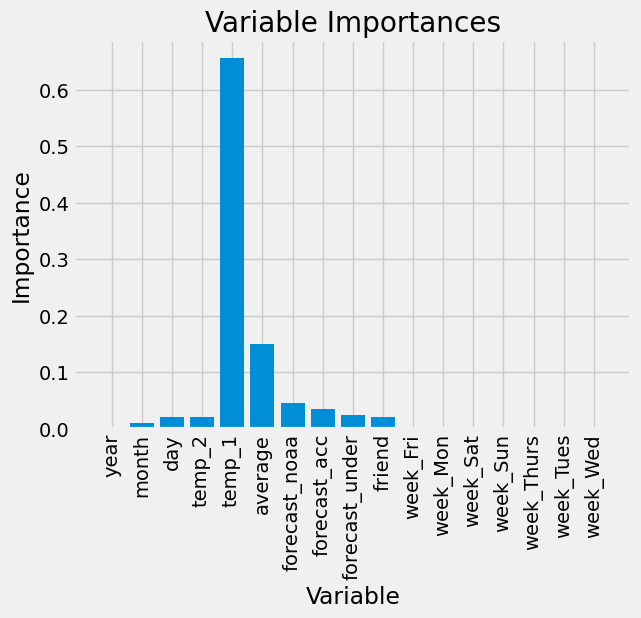

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [21]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


Khi chỉ sử dụng 2 biến quan trọng nhất (temp_1 và average), mô hình đạt độ chính xác rất cao là 93.76% với sai số trung bình (MAE) chỉ 3.92 độ.

Mô hình rất tối ưu; việc loại bỏ các biến thừa không làm giảm chất lượng dự báo mà còn giúp mô hình gọn nhẹ, chạy nhanh hơn.